<a href="https://colab.research.google.com/github/ShambhaviSharma0110/Auto-essay-grader/blob/main/Classifying_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CLASSIFYING FEATURES

The idea to classify the features comes from the below mentioned paper     
Suresh, A., & Jha, M. (2018). Automated essay grading using natural language processing and support vector machine. International Journal of Computing and Technology, 5(2), 18-21.

In [1]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [16]:
data = pd.read_csv('features.csv')

In [17]:
data

,essay_id,essay,domain1_score,word_count,sent_count,avg_word_len,lemma_count,spell_err_count,noun_count,adj_count,verb_count,adv_count,neg_score,pos_score,nue_score,similarity
0,11827,"In this memoir of Narciso Rodriguez, @PERSON3'...",2,133,8,4.383459,81,0.067669,0.255639,0.030075,0.218045,0.022556,0.000,0.153,0.847,0.102273
1,11828,Throughout the excerpt from Home the Blueprint...,2,168,7,4.285714,102,0.011905,0.220238,0.083333,0.184524,0.071429,0.009,0.189,0.802,0.098348
2,11829,The mood the author created in the memoir is l...,3,112,6,4.580357,75,0.080357,0.321429,0.080357,0.169643,0.035714,0.000,0.205,0.795,0.169553
3,11830,The mood created by the author is showing how ...,1,75,3,4.226667,44,0.146667,0.240000,0.106667,0.200000,0.013333,0.030,0.138,0.832,0.034662
4,11831,The mood created in the memoir is happiness an...,3,127,8,4.283465,68,0.047244,0.228346,0.086614,0.173228,0.070866,0.000,0.260,0.740,0.158431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800,13627,The mood of this memoir is nonfiction. The moo...,2,132,7,4.393939,71,0.015152,0.318182,0.053030,0.174242,0.037879,0.000,0.203,0.797,0.106523
1801,13628,The mood was created by the author in the memo...,0,30,1,4.033333,21,0.133333,0.333333,0.000000,0.166667,0.000000,0.000,0.148,0.852,0.061781
1802,13629,"In the memoir ""Narciso Rodriguez"", the mood cr...",4,166,9,4.421687,93,0.066265,0.246988,0.114458,0.222892,0.012048,0.000,0.239,0.761,0.103630
1803,13630,"The mood created @CAPS3 the author, Narciso Ro...",3,132,6,4.492424,86,0.090909,0.318182,0.037879,0.166667,0.060606,0.000,0.195,0.805,0.165012


In [14]:
#data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [18]:
X=data.iloc[:,3:]
y=data.iloc[:,2]

In [19]:
X_train, X_test , y_train, y_test = train_test_split(X ,y, test_size=0.18 , random_state=0)

#### RANDOM FOREST CLASSIFIER

In [25]:
rf = RandomForestClassifier(class_weight='balanced_subsample')

In [26]:
rf_params = {'n_estimators':list(range(20,200,10)),
                'max_depth':list(range(2,14,1))}

In [27]:
import sklearn.metrics
from sklearn.metrics import make_scorer
scorer = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average = 'macro')
rf_random=GridSearchCV(estimator = rf, param_grid  = rf_params, cv = 5, verbose=2,  n_jobs = 2, scoring=scorer)

In [28]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced_subsample'),
             n_jobs=2,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
                         'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100,
                                          110, 120, 130, 140, 150, 160, 170,
                                          180, 190]},
             scoring=make_scorer(f1_score, average=macro), verbose=2)

In [29]:
rf_final = RandomForestClassifier(random_state=0, n_estimators=rf_random.best_params_['n_estimators'], max_depth=rf_random.best_params_['max_depth'],class_weight='balanced_subsample')
rf_final.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=5,
                       n_estimators=110, random_state=0)

In [30]:
X_pred = rf_final.predict(X_test)

In [31]:
report = classification_report(X_pred,y_test,digits=3)
print(report)

              precision    recall  f1-score   support

           0      0.200     0.500     0.286         2
           1      0.745     0.594     0.661        69
           2      0.554     0.713     0.623        87
           3      0.713     0.673     0.692       107
           4      0.808     0.700     0.750        60

    accuracy                          0.671       325
   macro avg      0.604     0.636     0.602       325
weighted avg      0.691     0.671     0.675       325



In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, X_pred)

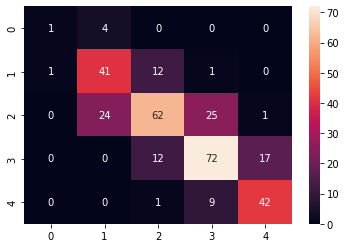

In [33]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, X_pred)

0.6707692307692308

#### XGB CLASSIFIER 

In [35]:
import xgboost as xgb
from xgboost import XGBClassifier

In [36]:
xgb_clf = XGBClassifier(tree_method = "exact", predictor = "cpu_predictor",
                            objective = "multi:softmax")

In [37]:
parameters = {"learning_rate": [0.1, 0.01, 0.001],
               "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
               "max_depth": [2, 4, 7, 10],
               "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
               "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
               "reg_alpha": [0, 0.5, 1],
               "reg_lambda": [1, 1.5, 2, 3, 4.5],
               "min_child_weight": [1, 3, 5, 7],
               "n_estimators": [100, 250, 500, 1000]}
# subsample: Denotes the subsample ratio of columns for each split, in each level.
# colsample_bytree: Denotes the fraction of columns to be randomly samples for each tree.
# gamma: Gamma specifies the minimum loss reduction required to make a split.
# reg_alpha: Lasso L1 regularization
# reg_lambda: Ridge L2 reguralarization

In [38]:
from sklearn.model_selection import RandomizedSearchCV
# Create RandomizedSearchCV Object
xgb_rscv = RandomizedSearchCV(xgb_clf, param_distributions = parameters, scoring = "f1_micro",
                             cv = 10, verbose = 3, random_state = 40 )

In [39]:
model_xgboost = xgb_rscv.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END colsample_bytree=1.0, gamma=1.5, learning_rate=0.1, max_depth=2, min_child_weight=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.6;, score=0.716 total time=   0.5s
[CV 2/10] END colsample_bytree=1.0, gamma=1.5, learning_rate=0.1, max_depth=2, min_child_weight=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.6;, score=0.696 total time=   0.5s
[CV 3/10] END colsample_bytree=1.0, gamma=1.5, learning_rate=0.1, max_depth=2, min_child_weight=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.6;, score=0.682 total time=   0.4s
[CV 4/10] END colsample_bytree=1.0, gamma=1.5, learning_rate=0.1, max_depth=2, min_child_weight=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.6;, score=0.655 total time=   0.4s
[CV 5/10] END colsample_bytree=1.0, gamma=1.5, learning_rate=0.1, max_depth=2, min_child_weight=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.6;, score=0.649 t

In [40]:
xgb_final = XGBClassifier(random_state=0, 
                          n_estimators=xgb_rscv.best_params_['n_estimators'], 
                          max_depth=xgb_rscv.best_params_['max_depth'],
                          learning_rate=xgb_rscv.best_params_['learning_rate'],
                          gamma=xgb_rscv.best_params_['gamma'],
                          colsample_bytree=xgb_rscv.best_params_['colsample_bytree'],
                          subsample=xgb_rscv.best_params_['subsample'],
                          reg_alpha=xgb_rscv.best_params_['reg_alpha'],
                          reg_lambda=xgb_rscv.best_params_['reg_lambda'],
                          min_child_weight=xgb_rscv.best_params_['min_child_weight'])
xgb_final.fit(X_train, y_train)

XGBClassifier(colsample_bytree=1.0, gamma=0.01, learning_rate=0.001,
              max_depth=10, min_child_weight=7, n_estimators=500,
              objective='multi:softprob', reg_alpha=1, reg_lambda=4.5,
              subsample=0.5)

In [41]:
y_pred = xgb_final.predict(X_test)

In [42]:
report = classification_report(y_pred,y_test,digits=3)
print(report)

              precision    recall  f1-score   support

           0      0.000     0.000     0.000         0
           1      0.600     0.688     0.641        48
           2      0.723     0.698     0.711       116
           3      0.812     0.678     0.739       121
           4      0.615     0.800     0.696        40

    accuracy                          0.702       325
   macro avg      0.550     0.573     0.557       325
weighted avg      0.725     0.702     0.709       325



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)

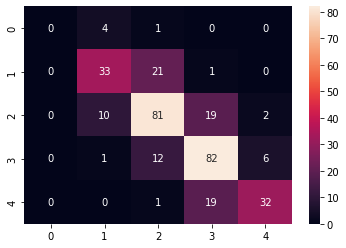

In [44]:
import seaborn as sns
sns.heatmap(cm1, annot=True)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7015384615384616

#### SUPPORT VECTOR CLASSIFIER

In [47]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_train)
X_Test = sc_X.transform(X_test)

In [48]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_Train, y_train)

SVC(random_state=0)

In [49]:
Y_Pred = classifier.predict(X_Test)

In [50]:
cm2 = confusion_matrix(y_test, Y_Pred)

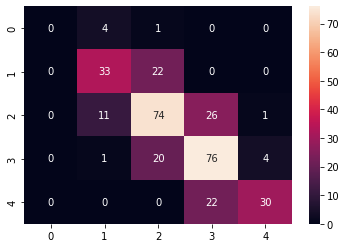

In [51]:
sns.heatmap(cm2, annot=True)

In [52]:
accuracy_score(y_test, Y_Pred)

0.6553846153846153